#                                       Brussels United FC -Player Analysis 

Project Objective:

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the palyers, the clubs they are currently playing for and various performance measures.
There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.


Data:

The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information on age, skill rating, wages and player value, etc. The files provided are as folows: 
fifa.csv – data file.
fifa_ variable_information.csv - information on individual variables.


# Player Analysis

DATA PRE-PROCESSING

In [128]:
#1.Required libaries:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('fifa.csv')

In [3]:
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
data.shape

(18207, 60)

In [5]:
#There are 18207 rows and 60 columns.

In [6]:
#Getting the useful columns:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [7]:
df=data.drop(['Photo','Flag','Club Logo'],axis=1)

In [8]:
df.head(3)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [9]:
df.shape

(18207, 57)

In [10]:
#1 value
df['Value'].dtypes

dtype('O')

In [11]:
df['Value'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [12]:
def change_cur(value):
    temp=0.0
    if value[-1]=='M':
        temp=float(value[1:-1])*1000000
    if value[-1]=='K':
        temp=float(value[1:-1])*1000
        
    return temp    

In [13]:
df['Value']=df['Value'].apply(change_cur)

In [14]:
df['Value'].dtypes

dtype('float64')

In [15]:
df.head(3)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [16]:
#2-Wage
df['Wage'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [17]:
df['Wage']=df['Wage'].apply(change_cur)

In [18]:
df.head(3)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [19]:
#3-Joined 
df['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2         Aug 3, 2017
3         Jul 1, 2011
4        Aug 30, 2015
             ...     
18202     May 3, 2017
18203    Mar 19, 2018
18204     Jul 1, 2017
18205    Apr 24, 2018
18206    Oct 30, 2018
Name: Joined, Length: 18207, dtype: object

In [20]:
df['Joined'].apply(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

In [21]:
df['Joined'].isnull().sum()

1553

In [22]:
df['Joined']=df['Joined'].fillna(0)

In [23]:
df['Joined'].isnull().sum()

0

In [24]:
def change_date(value):
    temp=0
    if type(value)!=int:
        temp=int(value[-4:])
    return temp
    

In [25]:
df['Joined']=df['Joined'].apply(change_date)

In [26]:
df['Joined'].apply(type).unique()

array([<class 'int'>], dtype=object)

In [27]:
df['Joined']

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: int64

In [28]:
#4 contract valid until:
df['Contract Valid Until']

0        2021
1        2022
2        2022
3        2020
4        2023
         ... 
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 18207, dtype: object

In [29]:
df['Contract Valid Until'].isnull().sum()

289

In [30]:
df['Contract Valid Until'].apply(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

In [31]:
df['Contract Valid Until']=pd.to_datetime(df['Contract Valid Until'])

In [32]:
#5 Height:
df['Height']

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18207, dtype: object

In [33]:
df['Height']=df['Height'].str.replace("'",'.').astype('float')

In [34]:
#6 weight 
df['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [35]:
df['Weight'].isnull().sum()

48

In [36]:
df['Weight'].apply(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

In [37]:
df['Weight']=df['Weight'].str.extract('(\d+)').astype('float')

In [38]:
df['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [39]:
#7 Release Cluase:
df['Release Clause']

0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
          ...   
18202      €143K
18203      €113K
18204      €165K
18205      €143K
18206      €165K
Name: Release Clause, Length: 18207, dtype: object

In [40]:
df['Release Clause'].isnull().sum()

1564

In [41]:
def change_currency(value):
    temp=0.0
    if type(value)==str:
        if value[-1]=='M':
            temp=float(value[1:-1])*1000000
        if value[-1]=='K':
            temp=float(value[1:-1])*1000
        
        return temp 

In [42]:
df['Release Clause']=df['Release Clause'].apply(change_currency)

In [43]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [44]:
# Missing value imputation :
df.isnull().sum()/len(df)*100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       0.000000
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys     

In [45]:
# from above data loaned from column can be droppped 
df.drop('Loaned From',axis=1,inplace=True)

In [46]:
df.shape

(18207, 56)

In [47]:
df1=df[['ID',                  
'Name',
'Age',
'Nationality',             
'Overall',                  
'Potential',                
'Club',                     
'Value',                    
'Wage',                    
'Preferred Foot',       
'International Reputation',
'Weak Foot',                
'Skill Moves',             
'Work Rate',                
'Body Type',                
'Position',                 
'Jersey Number',            
'Joined',                                
'Contract Valid Until',     
'Height',                   
'Weight',
'Release Clause']]

In [48]:
df1.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,4.0,Medium/ Medium,Messi,RF,10.0,2004,2021-01-01,5.70,159.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,5.0,High/ Low,C. Ronaldo,ST,7.0,2018,2022-01-01,6.20,183.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,5.0,High/ Medium,Neymar,LW,10.0,2017,2022-01-01,5.90,150.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,1.0,Medium/ Medium,Lean,GK,1.0,2011,2020-01-01,6.40,168.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,4.0,High/ High,Normal,RCM,7.0,2015,2023-01-01,5.11,154.0,196400000.0


In [49]:
df1.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Joined                         0
Contract Valid Until         289
Height                        48
Weight                        48
Release Clause              1564
dtype: int64

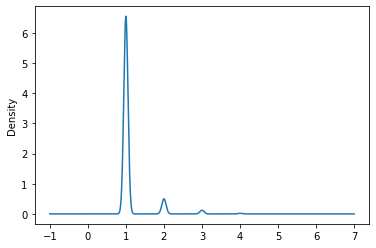

In [50]:
df1['International Reputation'].plot(kind='kde')

In [51]:
df1['International Reputation'].describe()

count    18159.000000
mean         1.113222
std          0.394031
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: International Reputation, dtype: float64

<ipython-input-52-bb907bd6ec08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['International Reputation']=df1['International Reputation'].fillna(df1['International Reputation'].mean())


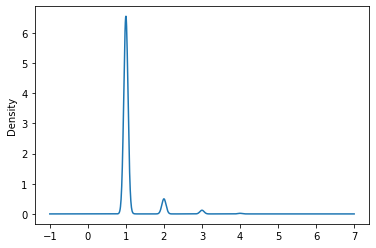

In [52]:
df1['International Reputation']=df1['International Reputation'].fillna(df1['International Reputation'].mean())
df1['International Reputation'].fillna(df1['International Reputation'].mean()).plot(kind='kde')

In [53]:
df1.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation       0
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Joined                         0
Contract Valid Until         289
Height                        48
Weight                        48
Release Clause              1564
dtype: int64

In [54]:
df1['Preferred Foot'].value_counts()/len(df1)*100

Right    76.607898
Left     23.128467
Name: Preferred Foot, dtype: float64

In [55]:
#pd.set_option('display.max_rows', df1.shape[0]+1)

In [56]:
df1['Preferred Foot']=df1['Preferred Foot'].fillna(df['Preferred Foot'].mode())

<ipython-input-56-7e31a7da1272>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Preferred Foot']=df1['Preferred Foot'].fillna(df['Preferred Foot'].mode())


In [57]:
df1['Weak Foot'].mode()

0    3.0
dtype: float64

In [58]:
df1.dtypes[df1.dtypes==float]

Value                       float64
Wage                        float64
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Jersey Number               float64
Height                      float64
Weight                      float64
Release Clause              float64
dtype: object

In [59]:
df1['Height'].mean()

5.797367145768057

In [60]:
df1['Height']=df1['Height'].fillna(df1['Height'].mean())

<ipython-input-60-08f702150283>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Height']=df1['Height'].fillna(df1['Height'].mean())


In [61]:
df1['Weight'].mean()

165.97912880665234

In [62]:
df1['Weight']=df1['Weight'].fillna(df1['Weight'].mean())

<ipython-input-62-4314409511c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Weight']=df1['Weight'].fillna(df1['Weight'].mean())


In [63]:
df1.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation       0
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Joined                         0
Contract Valid Until         289
Height                         0
Weight                         0
Release Clause              1564
dtype: int64

In [64]:
df1['Weak Foot'].mean()

2.9472988600693872

In [65]:
df1['Weak Foot']=df1['Weak Foot'].fillna(df1['Weak Foot'].mean())

<ipython-input-65-eea2913d4289>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Weak Foot']=df1['Weak Foot'].fillna(df1['Weak Foot'].mean())


In [66]:
df1['Skill Moves'].mean()

2.361308442094829

In [67]:
df1['Skill Moves']=df1['Skill Moves'].fillna(df1['Skill Moves'].mean())

<ipython-input-67-3f0bb9150763>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Skill Moves']=df1['Skill Moves'].fillna(df1['Skill Moves'].mean())


In [68]:
df1['Work Rate'].value_counts()/len(df1)*100

Medium/ Medium    53.880376
High/ Medium      17.427363
Medium/ High       9.282144
High/ High         5.574779
Medium/ Low        4.668534
High/ Low          3.839183
Low/ Medium        2.466084
Low/ High          2.411161
Low/ Low           0.186741
Name: Work Rate, dtype: float64

In [69]:
df1['Work Rate']=df1['Work Rate'].fillna(df1['Work Rate'].mode())

<ipython-input-69-4107eccfa6e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Work Rate']=df1['Work Rate'].fillna(df1['Work Rate'].mode())


In [70]:
df1['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa', nan],
      dtype=object)

In [71]:
df1['Body Type']=df1['Body Type'].replace({'Messi':'Normal','C. Ronaldo':'Normal','Neymar':'Normal','PLAYER_BODY_TYPE_25':'Normal',
                         'Shaqiri':'Normal','Akinfenwa':'Normal','Courtois':'Normal'})

<ipython-input-71-59a933e3edd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Body Type']=df1['Body Type'].replace({'Messi':'Normal','C. Ronaldo':'Normal','Neymar':'Normal','PLAYER_BODY_TYPE_25':'Normal',


In [72]:
df1['Body Type'].unique()

array(['Normal', 'Lean', 'Stocky', nan], dtype=object)

In [73]:
df1['Body Type']=df1['Body Type'].fillna(df1['Body Type'].mode()[0])

<ipython-input-73-2f61520ae9a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Body Type']=df1['Body Type'].fillna(df1['Body Type'].mode()[0])


In [74]:
df1['Contract Valid Until'].value_counts()

2019-01-01    4870
2021-01-01    4360
2020-01-01    4027
2022-01-01    1477
2023-01-01    1053
2019-06-30     931
2018-01-01     886
2018-12-31     144
2019-05-31      60
2024-01-01      23
2020-06-30      14
2019-01-31      13
2025-01-01       7
2019-01-05       6
2019-01-02       6
2019-01-12       5
2019-10-14       5
2019-01-06       4
2019-01-07       3
2019-01-25       3
2019-12-31       3
2019-12-01       2
2026-01-01       2
2020-05-31       2
2018-11-30       2
2019-01-20       1
2019-01-30       1
2019-05-04       1
2019-01-04       1
2019-01-03       1
2019-01-11       1
2020-02-27       1
2019-01-18       1
2019-01-15       1
2019-06-01       1
Name: Contract Valid Until, dtype: int64

In [75]:
df1.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                     48
Body Type                      0
Position                      60
Jersey Number                 60
Joined                         0
Contract Valid Until         289
Height                         0
Weight                         0
Release Clause              1564
dtype: int64

In [76]:
df1['Contract Valid Until'].mode()

0   2019-01-01
dtype: datetime64[ns]

In [77]:
# Hypothetical statement: since the next possible least contract end date can be considered as 01-01-2021
df1['Contract Valid Until']=df1['Contract Valid Until'].fillna(pd.to_datetime('2021-01-01'))


<ipython-input-77-3a30119d7ab5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Contract Valid Until']=df1['Contract Valid Until'].fillna(pd.to_datetime('2021-01-01'))


In [78]:
df1.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                     48
Body Type                      0
Position                      60
Jersey Number                 60
Joined                         0
Contract Valid Until           0
Height                         0
Weight                         0
Release Clause              1564
dtype: int64

In [79]:
df1['Release Clause']=df1['Release Clause'].fillna(df1.groupby('Position')['Release Clause'].transform('mean'))

<ipython-input-79-061334408a4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Release Clause']=df1['Release Clause'].fillna(df1.groupby('Position')['Release Clause'].transform('mean'))


In [80]:
df1.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                         0
Wage                          0
Preferred Foot               48
International Reputation      0
Weak Foot                     0
Skill Moves                   0
Work Rate                    48
Body Type                     0
Position                     60
Jersey Number                60
Joined                        0
Contract Valid Until          0
Height                        0
Weight                        0
Release Clause               60
dtype: int64

In [108]:
df1['Release Clause']=df1['Release Clause'].fillna(df1['Release Clause'].mean())

<ipython-input-108-e7c8261c4d97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Release Clause']=df1['Release Clause'].fillna(df1['Release Clause'].mean())


In [109]:
df1.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                         0
Wage                          0
Preferred Foot               48
International Reputation      0
Weak Foot                     0
Skill Moves                   0
Work Rate                    48
Body Type                     0
Position                     60
Jersey Number                60
Joined                        0
Contract Valid Until          0
Height                        0
Weight                        0
Release Clause                0
Rank                          0
dtype: int64

# Exploratory Analysis:

# 1.	Plot the distribution of Overall rating for all players. 

In [81]:
df1.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,4.0,Medium/ Medium,Normal,RF,10.0,2004,2021-01-01,5.70,159.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,5.0,High/ Low,Normal,ST,7.0,2018,2022-01-01,6.20,183.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,5.0,High/ Medium,Normal,LW,10.0,2017,2022-01-01,5.90,150.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,1.0,Medium/ Medium,Lean,GK,1.0,2011,2020-01-01,6.40,168.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,4.0,High/ High,Normal,RCM,7.0,2015,2023-01-01,5.11,154.0,196400000.0


Text(0.5, 1.0, 'Distribution Plot of Overall value of all the players')

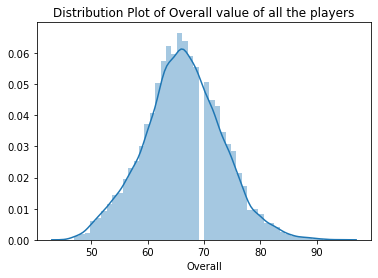

In [125]:
sns.distplot(a=df1['Overall'])
plt.title('Distribution Plot of Overall value of all the players')

# 2.	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


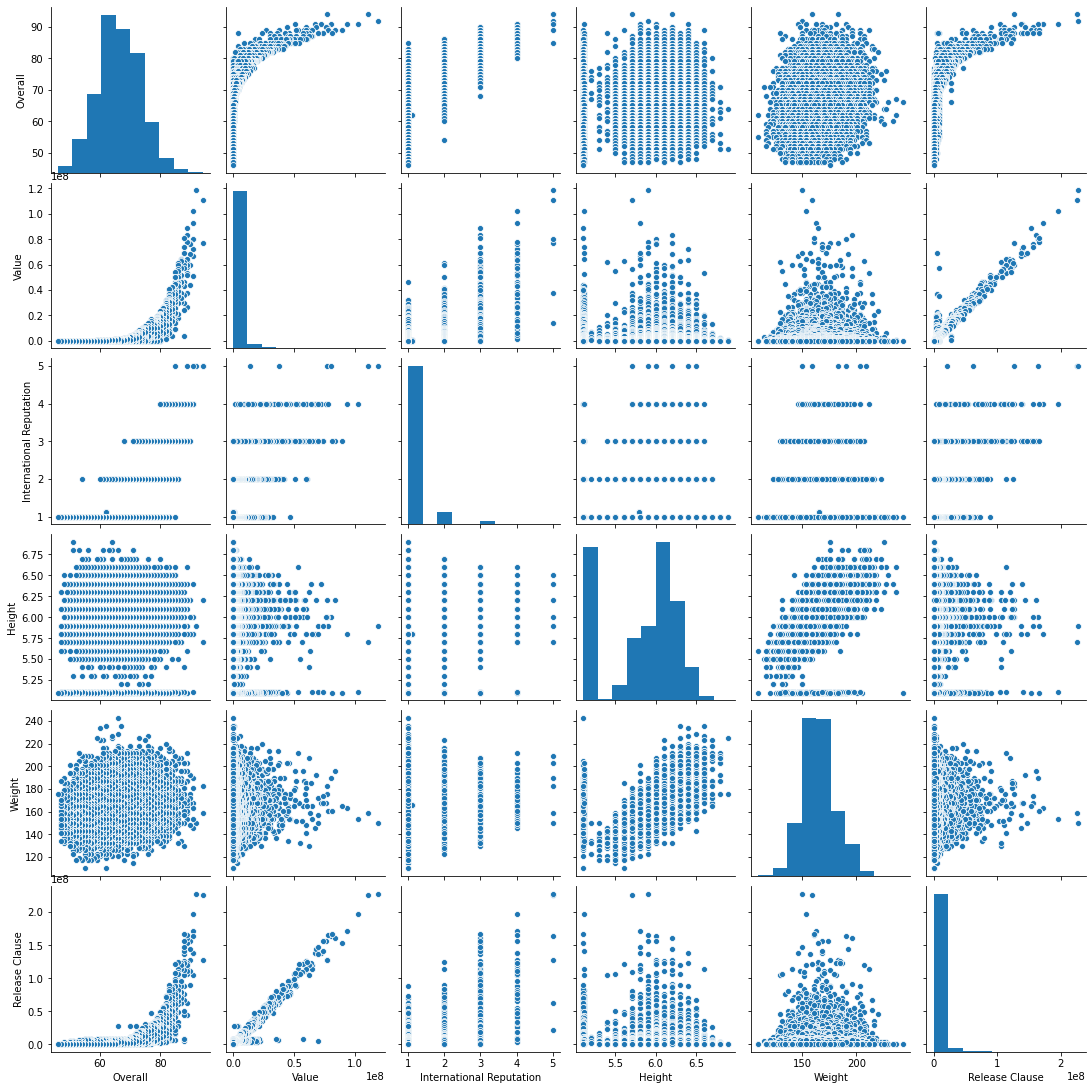

In [83]:
sns.pairplot(data=df1[['Overall','Value','International Reputation','Height','Weight','Release Clause']])

In [84]:
# inference :
#The value of the player and the release clause are having a linear relationship.

# 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.



In [85]:
df1['Rank']=df1['Overall'].rank(axis=0,ascending=False,method='dense')

<ipython-input-85-e69770cf3b53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Rank']=df1['Overall'].rank(axis=0,ascending=False,method='dense')


In [86]:
df1.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Release Clause,Rank
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,Medium/ Medium,Normal,RF,10.0,2004,2021-01-01,5.70,159.0,226500000.0,1.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,High/ Low,Normal,ST,7.0,2018,2022-01-01,6.20,183.0,127100000.0,1.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,High/ Medium,Normal,LW,10.0,2017,2022-01-01,5.90,150.0,228100000.0,2.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,Medium/ Medium,Lean,GK,1.0,2011,2020-01-01,6.40,168.0,138600000.0,3.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,High/ High,Normal,RCM,7.0,2015,2023-01-01,5.11,154.0,196400000.0,3.0


In [87]:
df1.sort_values(by=['Rank'],axis=0,inplace=True)

<ipython-input-87-a024c3ba897f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values(by=['Rank'],axis=0,inplace=True)


In [88]:
df2=df1[ pd.DatetimeIndex(df1['Contract Valid Until']).year==2020 ].iloc[0:20]

In [89]:
df2

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Release Clause,Rank
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,Medium/ Medium,Lean,GK,1.0,2011,2020-01-01,6.40,168.0,138600000.0,3.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,High/ Medium,Normal,LF,10.0,2012,2020-01-01,5.80,163.0,172100000.0,3.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,High/ High,Lean,RCM,10.0,2012,2020-01-01,5.80,146.0,137400000.0,3.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,High/ Medium,Normal,RCB,15.0,2005,2020-01-01,6.00,181.0,104600000.0,3.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,High/ Medium,Normal,LCM,21.0,2010,2020-01-01,5.80,148.0,111000000.0,4.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,...,High/ High,Lean,LS,21.0,2013,2020-01-01,6.10,170.0,111000000.0,5.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,Medium/ High,Normal,LCB,3.0,2005,2020-01-01,6.20,187.0,44600000.0,5.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,...,Medium/ High,Normal,RCB,2.0,2012,2020-01-01,6.00,181.0,44400000.0,6.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,High/ Medium,Lean,CAM,10.0,2013,2020-01-01,5.11,168.0,141500000.0,6.0
49,189332,Jordi Alba,29,Spain,87,87,FC Barcelona,38000000.0,250000.0,Left,...,High/ Medium,Normal,LB,18.0,2012,2020-01-01,5.70,150.0,77900000.0,7.0


# a)	What would the average wage for this set of players be?

In [90]:
df2['Wage'].mean()

203950.0

In [91]:
#The average Wage of the above player list is €203950.0

# b)	What is the average age?

In [92]:
df2['Age'].mean()

30.7

In [93]:
#The average age of the above players is 30.7 Years

# c)	Is there a correlation between the Overall rating and Value for these players?

In [94]:
df2[['Overall','Value']].corr()

,Overall,Value
Overall,1.000000,0.778674
Value,0.778674,1.000000


In [95]:
# There is a positive correlation(0.77) between Overall rating and Value fro the above players.

# 4.	Generate tables containing the top 5 players by Overall rating for each unique position.

In [96]:
df1.head(3)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Release Clause,Rank
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,Medium/ Medium,Normal,RF,10.0,2004,2021-01-01,5.7,159.0,226500000.0,1.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,High/ Low,Normal,ST,7.0,2018,2022-01-01,6.2,183.0,127100000.0,1.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,High/ Medium,Normal,LW,10.0,2017,2022-01-01,5.9,150.0,228100000.0,2.0


In [97]:
df3=df1.groupby(['Position'])

In [98]:
df3

In [99]:
df4= df3.apply(lambda x: x.sort_values(["Rank"]))

In [100]:
df4

ID                Name  Age Nationality  Overall  \
Position                                                               
CAM      17     194765        A. Griezmann   27      France       89   
         31     190460          C. Eriksen   26     Denmark       88   
         74     176635             M. Özil   29     Germany       86   
         66     189596           T. Müller   28     Germany       86   
         61     201942     Roberto Firmino   26      Brazil       86   
...                ...                 ...  ...         ...      ...   
ST       18166  243621            N. Ayéva   16      Sweden       48   
         18200  231381            J. Young   18    Scotland       47   
         18204  241638           B. Worman   16     England       47   
         18203  243165  N. Christoffersson   19      Sweden       47   
         18189  240160          A. Kaltner   18     Germany       47   

                Potential                Club       Value      Wage  \
Position                                                              
CAM      17            90     Atlético Madrid  78000000.0  145000.0   
         31            91   Tottenham Hotspur  73500000.0  205000.0   
         74            86             Arsenal  43500000.0  190000.0   
         66            86   FC Bayern München  45000000.0  135000.0   
         61            87           Liverpool  53000000.0  195000.0   
...                   ...                 ...         ...       ...   
ST       18166         72           Örebro SK     70000.0    1000.0   
         18200         62        Swindon Town     60000.0    1000.0   
         18204         67    Cambridge United     60000.0    1000.0   
         18203         63      Trelleborgs FF     60000.0    1000.0   
         18189         61  SpVgg Unterhaching     60000.0    1000.0   

               Preferred Foot  ...       Work Rate  Body Type  Position  \
Position                       ...                                        
CAM      17              Left  ...      High/ High       Lean       CAM   
         31             Right  ...    High/ Medium       Lean       CAM   
         74              Left  ...     Medium/ Low       Lean       CAM   
         66             Right  ...      High/ High       Lean       CAM   
         61             Right  ...      High/ High       Lean       CAM   
...                       ...  ...             ...        ...       ...   
ST       18166          Right  ...  Medium/ Medium     Normal        ST   
         18200           Left  ...  Medium/ Medium       Lean        ST   
         18204          Right  ...  Medium/ Medium     Normal        ST   
         18203          Right  ...  Medium/ Medium     Normal        ST   
         18189          Right  ...  Medium/ Medium       Lean        ST   

               Jersey Number Joined Contract Valid Until  Height  Weight  \
Position                                                                   
CAM      17              7.0   2014           2023-01-01    5.90   161.0   
         31             10.0   2013           2020-01-01    5.11   168.0   
         74             10.0   2013           2021-01-01    5.11   168.0   
         66             13.0   2008           2021-01-01    6.10   165.0   
         61              9.0   2015           2023-01-01    5.11   168.0   
...                      ...    ...                  ...     ...     ...   
ST       18166          23.0   2018           2020-01-01    5.10   154.0   
         18200          21.0   2015           2019-01-01    5.90   157.0   
         18204          33.0   2017           2021-01-01    5.80   148.0   
         18203          21.0   2018           2020-01-01    6.30   170.0   
         18189          24.0   2017           2020-01-01    5.10   165.0   

               Release Clause  Rank  
Position                             
CAM      17       165800000.0   5.0  
         31       141500000.0   6.0  
         74        82700000.0   8.0  
    

In [101]:
df5=df4.reset_index(drop=True)

In [102]:
df5

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Release Clause,Rank
0,194765,A. Griezmann,27,France,89,90,Atlético Madrid,78000000.0,145000.0,Left,...,High/ High,Lean,CAM,7.0,2014,2023-01-01,5.90,161.0,165800000.0,5.0
1,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,High/ Medium,Lean,CAM,10.0,2013,2020-01-01,5.11,168.0,141500000.0,6.0
2,176635,M. Özil,29,Germany,86,86,Arsenal,43500000.0,190000.0,Left,...,Medium/ Low,Lean,CAM,10.0,2013,2021-01-01,5.11,168.0,82700000.0,8.0
3,189596,T. Müller,28,Germany,86,86,FC Bayern München,45000000.0,135000.0,Right,...,High/ High,Lean,CAM,13.0,2008,2021-01-01,6.10,165.0,74300000.0,8.0
4,201942,Roberto Firmino,26,Brazil,86,87,Liverpool,53000000.0,195000.0,Right,...,High/ High,Lean,CAM,9.0,2015,2023-01-01,5.11,168.0,104700000.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18142,243621,N. Ayéva,16,Sweden,48,72,Örebro SK,70000.0,1000.0,Right,...,Medium/ Medium,Normal,ST,23.0,2018,2020-01-01,5.10,154.0,158000.0,46.0
18143,231381,J. Young,18,Scotland,47,62,Swindon Town,60000.0,1000.0,Left,...,Medium/ Medium,Lean,ST,21.0,2015,2019-01-01,5.90,157.0,143000.0,47.0
18144,241638,B. Worman,16,England,47,67,Cambridge United,60000.0,1000.0,Right,...,Medium/ Medium,Normal,ST,33.0,2017,2021-01-01,5.80,148.0,165000.0,47.0
18145,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,Right,...,Medium/ Medium,Normal,ST,21.0,2018,2020-01-01,6.30,170.0,113000.0,47.0


In [103]:
d6=df5.groupby('Position').head(5)

In [104]:
pd.set_option('display.max_rows', d6.shape[0]+1)
d6.set_index(keys=['Position'])

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Skill Moves,Work Rate,Body Type,Jersey Number,Joined,Contract Valid Until,Height,Weight,Release Clause,Rank
Position,,,,,,,,,,,,,,,,,,,,,
CAM,194765,A. Griezmann,27,France,89,90,Atlético Madrid,78000000.0,145000.0,Left,...,4.0,High/ High,Lean,7.0,2014,2023-01-01,5.90,161.0,1.658000e+08,5.0
CAM,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,4.0,High/ Medium,Lean,10.0,2013,2020-01-01,5.11,168.0,1.415000e+08,6.0
CAM,176635,M. Özil,29,Germany,86,86,Arsenal,43500000.0,190000.0,Left,...,4.0,Medium/ Low,Lean,10.0,2013,2021-01-01,5.11,168.0,8.270000e+07,8.0
CAM,189596,T. Müller,28,Germany,86,86,FC Bayern München,45000000.0,135000.0,Right,...,3.0,High/ High,Lean,13.0,2008,2021-01-01,6.10,165.0,7.430000e+07,8.0
CAM,201942,Roberto Firmino,26,Brazil,86,87,Liverpool,53000000.0,195000.0,Right,...,4.0,High/ High,Lean,9.0,2015,2023-01-01,5.11,168.0,1.047000e+08,8.0
CB,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,Right,...,2.0,Medium/ High,Lean,10.0,2010,2019-01-01,6.20,172.0,9.020000e+07,4.0
CB,205600,S. Umtiti,24,France,87,92,FC Barcelona,57000000.0,205000.0,Left,...,2.0,Medium/ High,Normal,23.0,2016,2023-01-01,6.00,165.0,1.211000e+08,7.0
CB,177509,M. Benatia,31,Morocco,86,86,Juventus,30000000.0,160000.0,Right,...,2.0,Medium/ High,Normal,4.0,2014,2020-01-01,6.20,207.0,4.950000e+07,8.0
CB,171919,Naldo,35,Brazil,85,85,FC Schalke 04,9000000.0,38000.0,Right,...,2.0,Medium/ Medium,Lean,29.0,2016,2020-01-01,6.60,201.0,1.530000e+07,9.0


# a)	Are there any players appearing in more than one Table. Please point out such players.

In [106]:
pd.merge(df2,d6,how='inner')

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Release Clause,Rank
0,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,Medium/ Medium,Lean,GK,1.0,2011,2020-01-01,6.40,168.0,138600000.0,3.0
1,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,High/ Medium,Normal,LF,10.0,2012,2020-01-01,5.80,163.0,172100000.0,3.0
2,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,High/ High,Lean,RCM,10.0,2012,2020-01-01,5.80,146.0,137400000.0,3.0
3,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,High/ Medium,Normal,RCB,15.0,2005,2020-01-01,6.00,181.0,104600000.0,3.0
4,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,High/ Medium,Normal,LCM,21.0,2010,2020-01-01,5.80,148.0,111000000.0,4.0
5,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,...,High/ High,Lean,LS,21.0,2013,2020-01-01,6.10,170.0,111000000.0,5.0
6,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,Medium/ High,Normal,LCB,3.0,2005,2020-01-01,6.20,187.0,44600000.0,5.0
7,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,...,Medium/ High,Normal,RCB,2.0,2012,2020-01-01,6.00,181.0,44400000.0,6.0
8,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,High/ Medium,Lean,CAM,10.0,2013,2020-01-01,5.11,168.0,141500000.0,6.0
9,189332,Jordi Alba,29,Spain,87,87,FC Barcelona,38000000.0,250000.0,Left,...,High/ Medium,Normal,LB,18.0,2012,2020-01-01,5.70,150.0,77900000.0,7.0


In [ ]:
#The above table shows all the players in both the tables.

# b)	What is the average wage one can expect to pay for the top 5 in every position?

In [107]:
d6.groupby('Position')['Wage'].mean()

Position
CAM    174000.0
CB     139600.0
CDM    199200.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    195400.0
LDM    138000.0
LF     123200.0
LM     169000.0
LS     130600.0
LW     261000.0
LWB     33000.0
RAM     46600.0
RB     155400.0
RCB    219000.0
RCM    257400.0
RDM    105000.0
RF     148000.0
RM     133000.0
RS     130400.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64

In [ ]:
# The above is the average wage that needs to be paid with respect to each position 